In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
print(os.listdir("drive/My Drive/Dogs and cats/dataset/test_set/dogs/"))

import os
print(os.listdir("drive/My Drive/Dogs and cats/dataset/test_set/cats/"))

['dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg', 'dog.4010.jpg', 'dog.4011.jpg', 'dog.4012.jpg', 'dog.4013.jpg', 'dog.4014.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4001.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4015.jpg', 'dog.4016.jpg', 'dog.4017.jpg', 'dog.4018.jpg', 'dog.4026.jpg', 'dog.4019.jpg', 'dog.4020.jpg', 'dog.4027.jpg', 'dog.4024.jpg', 'dog.4022.jpg', 'dog.4021.jpg', 'dog.4025.jpg', 'dog.4023.jpg', 'dog.4028.jpg', 'dog.4029.jpg', 'dog.4030.jpg', 'dog.4031.jpg', 'dog.4032.jpg', 'dog.4040.jpg', 'dog.4035.jpg', 'dog.4033.jpg', 'dog.4037.jpg', 'dog.4034.jpg', 'dog.4036.jpg', 'dog.4041.jpg', 'dog.4042.jpg', 'dog.4038.jpg', 'dog.4039.jpg', 'dog.4043.jpg', 'dog.4044.jpg', 'dog.4052.jpg', 'dog.4045.jpg', 'dog.4046.jpg', 'dog.4053.jpg', 'dog.4054.jpg', 'dog.4047.jpg', 'dog.4048.jpg', 'dog.4051.jpg', 'dog.4049.jpg', 'dog.4050.jpg', 'dog.4055.jpg', 'dog.4056.jpg', 'dog.4057.jpg', 'dog.4058.jpg', 'dog.4066.jpg', 'dog.4067.jpg', 'dog.4060.jpg', 'dog.4059.jpg', 'dog.40

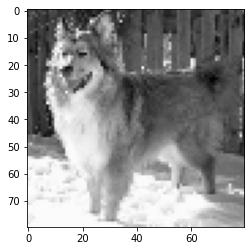

In [0]:
main_dir = "drive/My Drive/Dogs and cats/dataset/"
train_dir = "test_set/dogs/"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80),interpolation = cv2.IMREAD_GRAYSCALE)
    plt.imshow(new_img_array,cmap="gray")
    break

In [0]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [0]:
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)


KeyboardInterrupt: ignored

In [0]:
#import pickle

#pickle.dump( X, open( "train_x", "wb" ) )
#pickle.dump( y, open( "train_y", "wb" ) )


In [0]:
import pickle
pickle_x = open("drive/My Drive/Dogs and cats/dataset/training_set/valid_x","rb")
pickle_y = open("drive/My Drive/Dogs and cats/dataset/training_set/valid_y","rb")
pickle_x_train = open("drive/My Drive/Dogs and cats/dataset/training_set/train_x","rb")
pickle_y_train = open("drive/My Drive/Dogs and cats/dataset/training_set/train_y","rb")
data_test = pickle.load(pickle_x)
label_test = pickle.load(pickle_y)
data_train = pickle.load(pickle_x_train)
label_train = pickle.load(pickle_y_train)
pickle_x.close()
pickle_y.close()
pickle_x_train.close()
pickle_y_train.close()

In [0]:
org_data_valid = data_test
org_label_valid = label_test

In [10]:
data_train


[array([[167, 174, 177, ..., 215, 211, 207],
        [167, 174, 177, ..., 217, 212, 208],
        [167, 174, 177, ..., 218, 216, 210],
        ...,
        [129, 132, 135, ...,   3,   3,   3],
        [127, 129, 132, ...,   3,   3,   3],
        [125, 127, 131, ...,   3,   3,   3]], dtype=uint8),
 array([[ 42,  44,  43, ...,  80,  89, 206],
        [ 42,  40,  40, ...,  78, 105, 189],
        [ 46,  38,  40, ...,  90,  89, 191],
        ...,
        [ 23,  21,  21, ...,  81,  81,  55],
        [ 21,  19,  19, ...,  20,  67,  84],
        [ 28,  21,  23, ...,  62,  63,  40]], dtype=uint8),
 array([[ 30,  12,  51, ..., 142, 152, 152],
        [ 46,  46,  52, ..., 142, 152, 155],
        [ 55,  58,  58, ..., 143, 154, 158],
        ...,
        [165, 168, 154, ..., 158, 168, 171],
        [157, 154, 154, ..., 160, 168, 172],
        [170, 159, 149, ..., 154, 169, 171]], dtype=uint8),
 array([[224, 223, 221, ..., 242, 239, 233],
        [220, 221, 223, ..., 248, 249, 240],
        [221, 22

In [0]:
data_train = np.array(data_train).reshape(-1, 80,80,1)
label_train = np.array(label_train)
data_test = np.array(data_test).reshape(-1,80,80,1)
label_test = np.array(label_test)


In [12]:
data_train.shape

(25000, 80, 80, 1)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data_train, label_train, test_size=0.1)

In [0]:
#data_train = data_train/255.0
x_train = x_train/255.0
x_valid = x_valid/255.0

(6400, 80, 80, 1)

In [0]:
result_train = []
for i in y_train:
  if i == 0:
    result_train.append([1,0])
  else:
    result_train.append([0,1])
result_train = np.array(result_train)

result_valid = []
for i in y_valid:
  if i == 0:
    result_valid.append([1,0])
  else:
    result_valid.append([0,1])
result_valid = np.array(result_valid)

In [16]:
result_train.shape

(22500, 2)

In [0]:
from keras.optimizers import Adam, SGD
from tensorflow import keras

model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = data_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(2, activation='softmax'))

opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])



Using TensorFlow backend.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


In [17]:
from keras.optimizers import Adam, SGD
from tensorflow import keras
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Using TensorFlow backend.


In [19]:
model.fit(x_train,result_train, epochs=100, batch_size=64,validation_data=((x_valid,result_valid)),callbacks = callbacks)

Epoch 1/100
352/352 [==============================] - 22s 63ms/step - loss: 0.7553 - accuracy: 0.6706 - val_loss: 2.2465 - val_accuracy: 0.5024 - lr: 0.0010
Epoch 2/100
352/352 [==============================] - 21s 61ms/step - loss: 0.4591 - accuracy: 0.7859 - val_loss: 0.5240 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 3/100
352/352 [==============================] - 21s 61ms/step - loss: 0.3921 - accuracy: 0.8245 - val_loss: 0.3962 - val_accuracy: 0.8284 - lr: 0.0010
Epoch 4/100
352/352 [==============================] - 22s 61ms/step - loss: 0.3431 - accuracy: 0.8518 - val_loss: 0.3746 - val_accuracy: 0.8332 - lr: 0.0010
Epoch 5/100
352/352 [==============================] - 21s 61ms/step - loss: 0.3009 - accuracy: 0.8713 - val_loss: 0.4865 - val_accuracy: 0.8184 - lr: 0.0010
Epoch 6/100
352/352 [==============================] - 21s 61ms/step - loss: 0.2725 - accuracy: 0.8851 - val_loss: 0.3617 - val_accuracy: 0.8340 - lr: 0.0010
Epoch 7/100
352/352 [==============================]

In [0]:
data_train.shape, result_train.shape, data_valid.shape, result_valid.shape

((6400, 80, 80, 1), (6400, 2), (1600, 80, 80, 1), (1600, 2))

In [0]:
train_dir = "test1/test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,80,80,1)
X_test = X_test/255

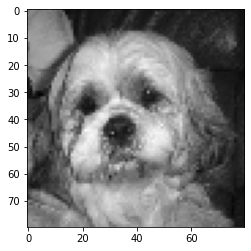

In [0]:
img_array = cv2.imread("drive/My Drive/Dogs and cats/dataset/test_set/dogs/dog.4210.jpg",cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80),interpolation = cv2.IMREAD_GRAYSCALE)
plt.imshow(new_img_array,cmap="gray")

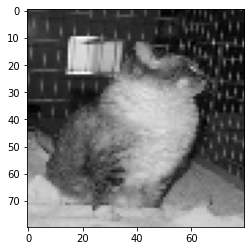

In [30]:
img_array = cv2.imread("drive/My Drive/Dogs and cats/dataset/test_set/cats/cat.4155.jpg",cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80),interpolation = cv2.IMREAD_GRAYSCALE)
plt.imshow(new_img_array,cmap="gray")

In [31]:
new_img_array = np.array(new_img_array).reshape(-1,80,80,1)
predictions = model.predict(new_img_array/255)
predictions

array([[9.9999511e-01, 4.9007463e-06]], dtype=float32)

In [0]:
predicted_val = [int(round(p[0])) for p in predictions]
predicted_val

In [0]:
predictions[4]

array([2.2529041e-06, 9.9999774e-01], dtype=float32)

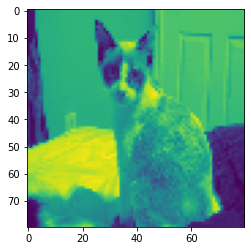

In [28]:
plt.imshow(org_data_valid[19])
plt.show()

In [21]:
predictions = model.predict(data_test/255)

  

array([4.994279e-06, 9.999950e-01], dtype=float32)

In [29]:
predictions[19]

array([0.9868983 , 0.01310169], dtype=float32)